In [6]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import random

plt.rcParams['figure.figsize'] = (10,6)

# Import

In [7]:
data = datasets.load_iris()

X = pd.DataFrame(data["data"])
X.columns = data["feature_names"]
y = pd.Series(data["target"], name="target").astype("category")
y.cat.categories = data["target_names"]

# Unsupervised learning: KMeans

In [9]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

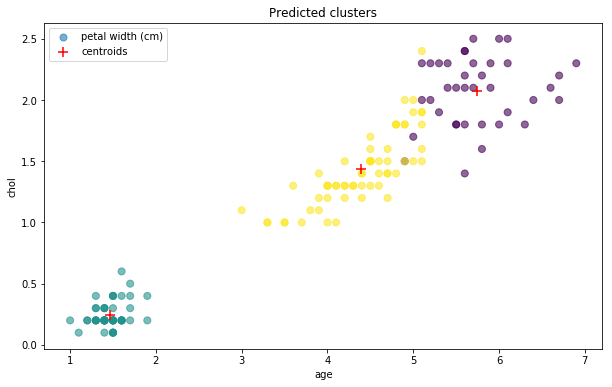

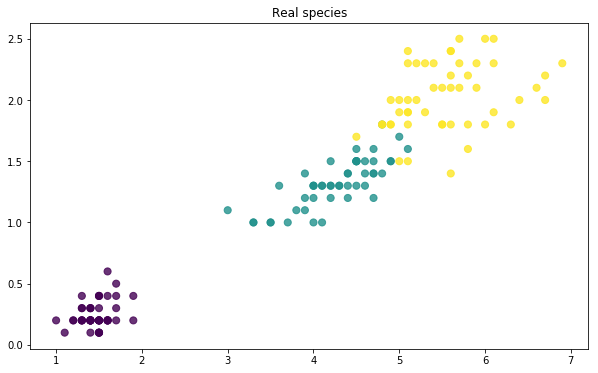

In [22]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters=3).fit(X)

centroids = model.cluster_centers_
centroids = pd.DataFrame(centroids, columns=data["feature_names"])

clusters = model.labels_

plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c= clusters, s=50, alpha=0.6)
plt.scatter(centroids.loc[:, 'petal length (cm)'], centroids.loc[:, 'petal width (cm)'], c='red', s=100, marker="+", label="centroids")
plt.xlabel("age")
plt.ylabel("chol")
plt.legend()
plt.title("Predicted clusters")
plt.show()

plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c= y.map( {"setosa":0, "versicolor":1, "virginica":2}), s=50, alpha=0.8)
plt.title("Real species")
plt.show()

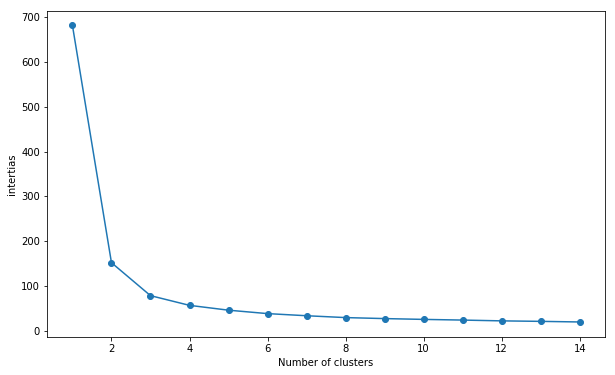

In [12]:
intertias = []

for i in range(1, 15):
    
    km = KMeans(
        n_clusters=i,
        random_state=0
    )
    km.fit(X)
    intertias.append(km.inertia_)

# plot
plt.plot(range(1, 15), intertias, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('intertias')
plt.show()

# Reinforcement learning: Multi armed bandit

## Packages import 

In [2]:
def reward(prob):
    reward = 0
    for i in range(10):
        if random.random() < prob:
            reward += 1
    return reward

reward(0.5)

7

### Model 

In [3]:
# based on a vector containing the arms number and corresponding reward as 2 columns
# this function returns which arm is currently the best
def bestArm(a):
    bestArm = 0 #default to 0
    bestMean = 0
    for u in a:
        avg = np.mean(a[np.where(a[:,0] == u[0])][:, 1]) #calculate mean reward for each action
        if bestMean < avg:
            bestMean = avg
            bestArm = u[0]
    return bestArm

# this function runs the reinforcement algorithm and produce one figure with 3 plots
def multi_armed_bandit(n_arms=10, eps=0.1, n_steps = 100):
    
    np.random.seed(5)

    arms = np.random.rand(n_arms) # define the probability to win of each arms
    print(arms)
    av = np.array([np.random.randint(0,(n_arms+1)), 0]).reshape(1,2)
    
    ax = plt.subplot(2,2,1)

    plt.ylabel("Average Reward")
    
    for i in range(n_steps):
    
        if random.random() > eps: #greedy exploitation action
            choice = bestArm(av)
        else: #exploration action
            choice = np.where(arms == np.random.choice(arms))[0][0]
            
        thisAV = np.array([[choice, reward(arms[choice])]]) #choice, reward
        av = np.concatenate((av, thisAV), axis=0) #add to our action-value memory array
        #calculate the mean reward
        runningMean = np.mean(av[:,1])
        ax.scatter(i, runningMean) # to see how reward is maximized over trials
    
    ax = plt.subplot(2,2,2)
    ax.scatter(av[:,0], np.random.random(len(av)), alpha=50/len(av)) # to visualize which arm is the best
    plt.xlabel("Arms ID")
    
    ax = plt.subplot(2,2,3)
    ax.scatter(np.arange(len(av)), av[:,1], alpha = 100/len(av)) # to visualize how reward evolve with trials
    plt.xlabel("Number of times played")
    plt.ylabel("Arms ID")

    ax = plt.subplot(2,2,4)
    ax.hist(av[:,0]) # to visualize how reward evolve with trials
    plt.xlabel("Arms ID")
    plt.ylabel("count")

## Playing with the model

[ 0.22199317  0.87073231  0.20671916  0.91861091  0.48841119  0.61174386
  0.76590786  0.51841799  0.2968005   0.18772123]


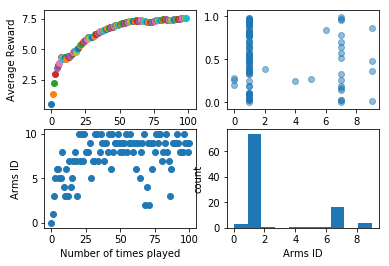

In [4]:
multi_armed_bandit()

[0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]


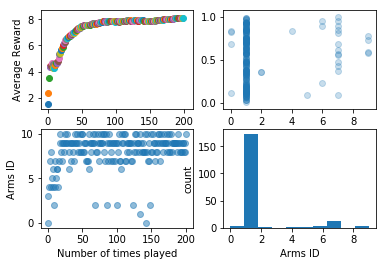

In [6]:
multi_armed_bandit(n_steps = 200)

[0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]


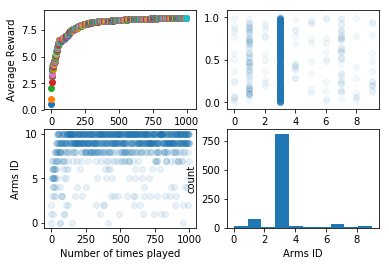

In [7]:
multi_armed_bandit(n_steps = 1000)

### Effect of eps

[0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]


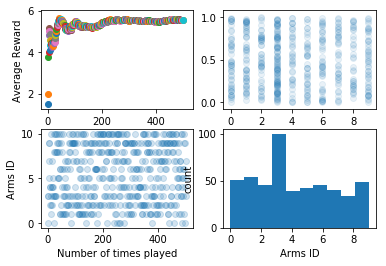

In [12]:
multi_armed_bandit(n_steps = 500,eps = 0.9)

[0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]


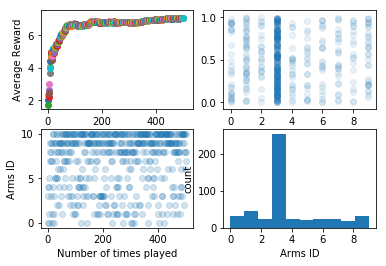

In [13]:
multi_armed_bandit(n_steps = 500,eps = 0.5)

[0.22199317 0.87073231 0.20671916 0.91861091 0.48841119 0.61174386
 0.76590786 0.51841799 0.2968005  0.18772123]


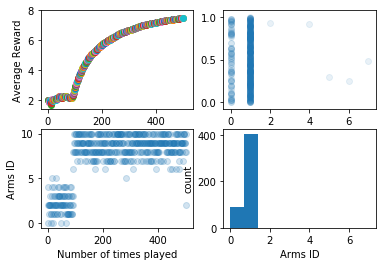

In [14]:
multi_armed_bandit(n_steps = 500,eps = 0.01)